In [12]:
%matplotlib inline
import cv2 
import numpy as np
import os
from PIL import Image
from matplotlib import pyplot as plt

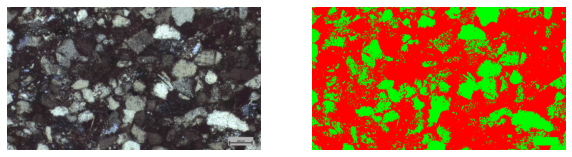

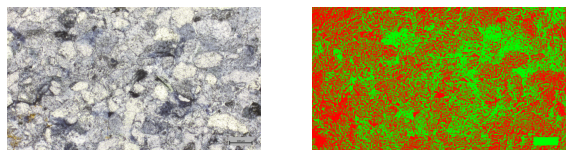

In [13]:
path = '/Users/elizavetashpilko/Downloads/Geo' #папка с фотографиями шлифов
path_to_save = '/Users/elizavetashpilko/Downloads/Geo_done' #куда сохраняем

# все файлы из папка обрабатываем по процедуре: если G-B<0, то пиксель=(255,0,0) (иначе (0,255,0))
for name in os.listdir(path):
    
    m =  cv2.imread(path+'/'+name)

    img =  m.astype(np.float64) 

    h, w, bpp = np.shape(m)
    
    #если G-B<0, то пиксель=(255,0,0) (иначе (0,255,0))
    for py in range(h):
        for px in range(w):
            a = img[py, px, 1] - img[py, px, 0]
            if (a < 0):
                img[py, px, 0] = 255
                img[py, px, 1], img[py, px, 2] = 0, 0
            else:
                img[py, px, 1] = 255
                img[py, px, 0], img[py, px, 2] = 0, 0

    
    img = img.astype(np.uint8)  # конвертируем обратно в uint8
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
    ax1.imshow(m)
    ax2.imshow(img)
    ax1.set_axis_off()
    ax2.set_axis_off()
    plt.savefig(path_to_save + '/' + name, bbox_inches='tight', dpi = 1000)

In [14]:
os.listdir(path_to_save)

['.DS_Store',
 'Геофизическая_60_85188_х10_2ник.jpg',
 'Геофизическая_60_85188_х10_1ник.jpg']

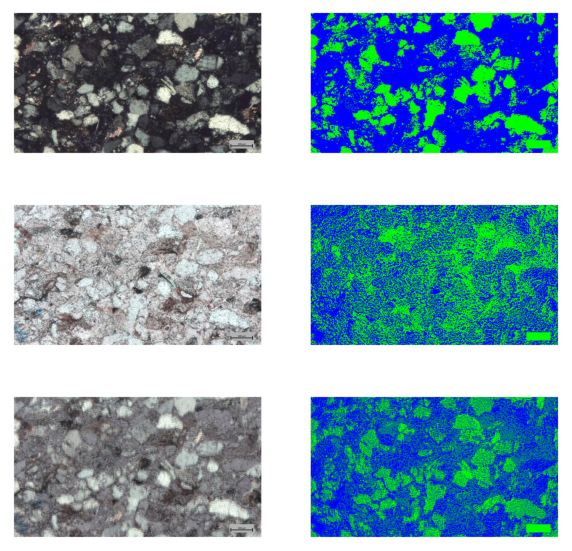

In [15]:
#Т.к. для одного шлифа 2 изображения произведём наложения (среднее арифметическое пикселей)

ds, name1, name2 = os.listdir(path_to_save)

im1 = cv2.imread(path_to_save+'/'+name1).astype(np.float64) 
im2 = cv2.imread(path_to_save+'/'+name2).astype(np.float64) 

im = (im1 +im2) / 2.

fig, axs = plt.subplots(3, 1, figsize=(10,10))
axs[0].imshow(im1.astype(np.uint8))
axs[0].set_axis_off()
axs[1].imshow(im2.astype(np.uint8))
axs[1].set_axis_off()
axs[2].imshow(im.astype(np.uint8))
axs[2].set_axis_off()

plt.savefig('Res.png', bbox_inches='tight', dpi = 1000)